Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [2]:
import pandas as pd

sheet_url = "https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/export?format=csv"
df = pd.read_csv(sheet_url)

df


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

<ipython-input-19-09b9ea22d75c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, color="blue", bw_adjust=1)


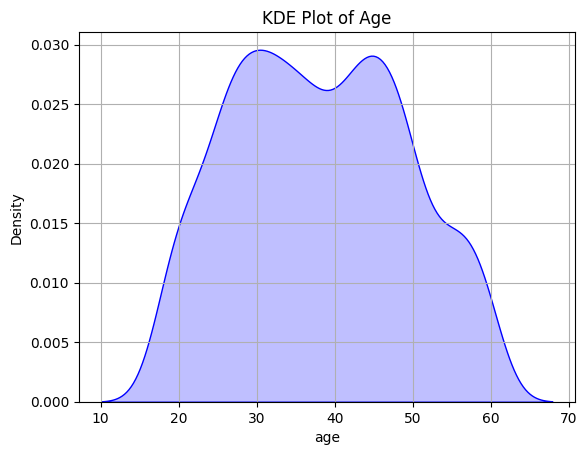

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df['age'], shade=True, color="blue", bw_adjust=1)
plt.title("KDE Plot of Age")
plt.grid()
plt.show()

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [30]:
total_patients = df['bmi'].notnull().sum()
patients_bmi_gt_30 = df[df['bmi'] > 30].shape[0]
probability = patients_bmi_gt_30 / total_patients

print(f"Total patients: {total_patients}")
print(f"Patients with BMI > 30: {patients_bmi_gt_30}")
print(f"Probability of a patient having BMI > 30: {probability:.4f}")

Total patients: 1340
Patients with BMI > 30: 699
Probability of a patient having BMI > 30: 0.5216


### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

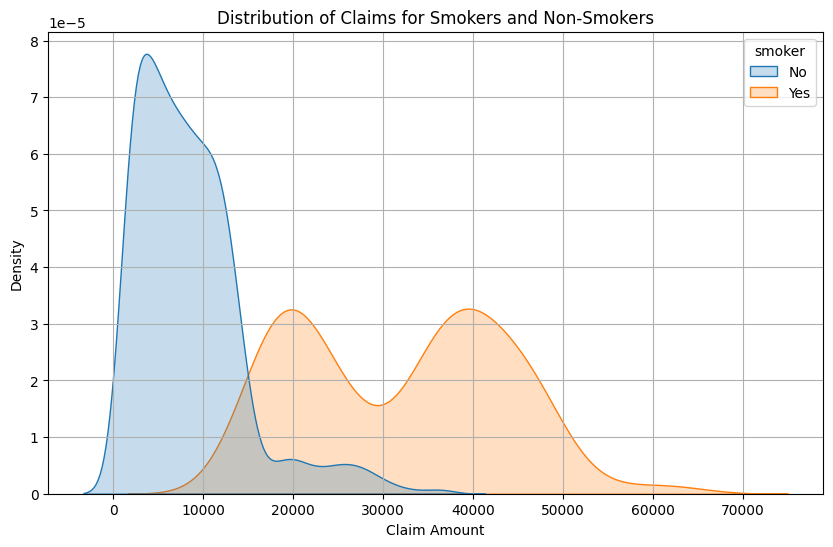

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='claim', hue='smoker', fill=True, common_norm=False)
plt.title('Distribution of Claims for Smokers and Non-Smokers')
plt.xlabel('Claim Amount')
plt.ylabel('Density')
plt.grid()
plt.show()

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

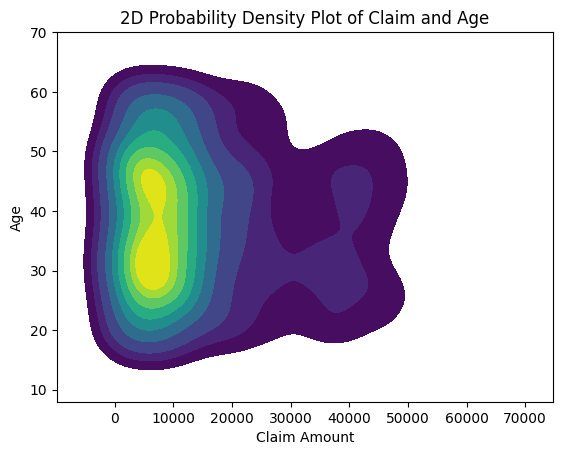

In [45]:
df=df.dropna(subset=['claim','age'])

sns.kdeplot(data=df,x='claim',y='age',cmap='viridis', fill=True)

plt.title('2D Probability Density Plot of Claim and Age')
plt.xlabel('Claim Amount')
plt.ylabel('Age')
plt.show()

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

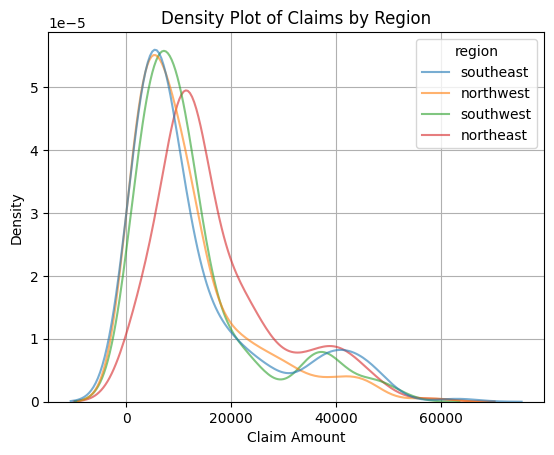

In [52]:
sns.kdeplot(
    data=df,
    x='claim',
    hue='region',
    common_norm=False,
    alpha=0.6,
    palette="tab10"
)
plt.title('Density Plot of Claims by Region')
plt.xlabel('Claim Amount')
plt.ylabel('Density')
plt.grid()
plt.show()

### Q6: Plot PDF and CDF of claim in insurance data

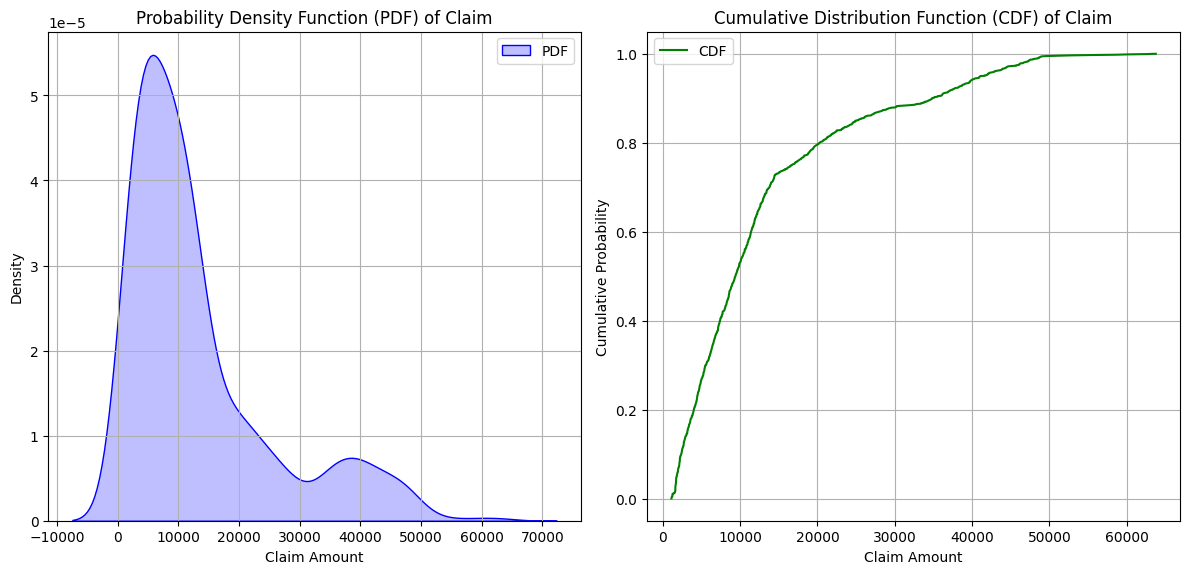

In [61]:
import numpy as np
claim_data = df['claim']

# Plot PDF and CDF
plt.figure(figsize=(12, 6))

# PDF Plot
plt.subplot(1, 2, 1)
sns.kdeplot(claim_data, fill=True, color="blue", label="PDF")
plt.title("Probability Density Function (PDF) of Claim")
plt.xlabel("Claim Amount")
plt.ylabel("Density")
plt.grid()
plt.legend()


# CDF Plot
plt.subplot(1, 2, 2)
claim_sorted = np.sort(claim_data)  # Sort claim data
cdf = np.arange(1, len(claim_sorted) + 1) / len(claim_sorted)  # Calculate CDF
plt.plot(claim_sorted, cdf, color="green", label="CDF")
plt.title("Cumulative Distribution Function (CDF) of Claim")
plt.xlabel("Claim Amount")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

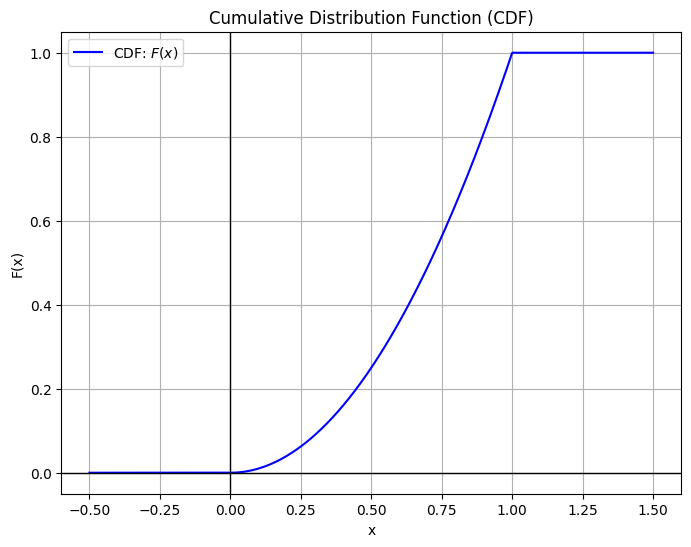

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return x**2
    else:
        return 1

# Generate x values
x_values = np.linspace(-0.5, 1.5, 1000)
y_values = [cdf(x) for x in x_values]

# Plotting the CDF
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="CDF: $F(x)$", color="blue")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

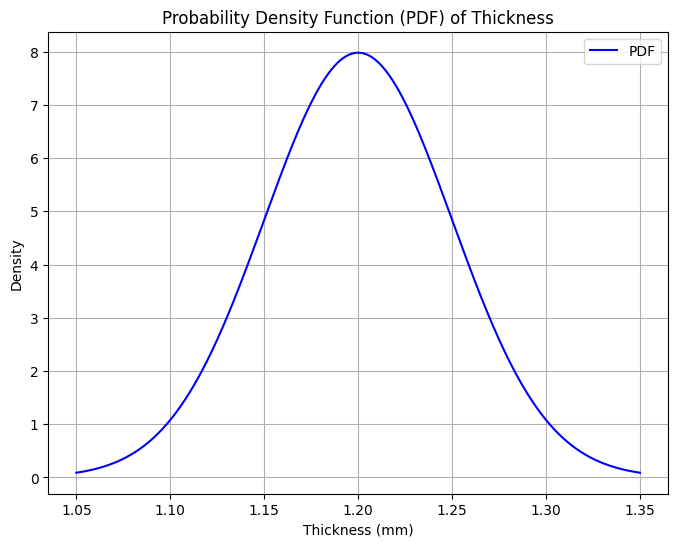

The probability that the thickness is between 1.1 mm and 1.3 mm is: 0.9545


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 1.2  # Mean (in mm)
sigma = 0.05  # Standard deviation (in mm)

# Define the x values for the plot
x_values = np.linspace(1.05, 1.35, 500)

# Calculate the PDF for the normal distribution
pdf_values = norm.pdf(x_values, mu, sigma)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x_values, pdf_values, label="PDF", color="blue")
plt.title("Probability Density Function (PDF) of Thickness")
plt.xlabel("Thickness (mm)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

# Compute the probability that the thickness is between 1.1 mm and 1.3 mm
probability = norm.cdf(1.3, mu, sigma) - norm.cdf(1.1, mu, sigma)
print(f"The probability that the thickness is between 1.1 mm and 1.3 mm is: {probability:.4f}")


### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

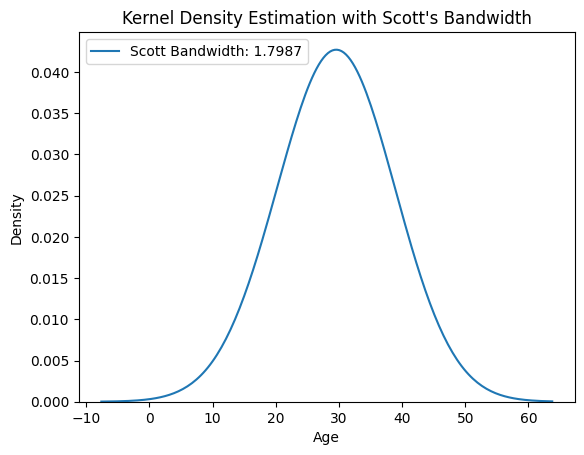

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
ages = np.random.normal(loc=30, scale=5, size=100)

# Scott's method for bandwidth
sigma = np.std(ages)  # Standard deviation
n = len(ages)  # Number of data points
h_scott = sigma * n**(-1/5)

# Plot KDE with Scott's bandwidth
sns.kdeplot(ages, bw_method=h_scott, label=f'Scott Bandwidth: {h_scott:.4f}')
plt.title("Kernel Density Estimation with Scott's Bandwidth")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()
